Past studies have shown that that alcohol has an adverse effect on overall health when consumed excessively, but there are hardly any studies about alcohol consumption and university students. 
The purpose of this research is to discover the effect of alcohol consumption towards university students’ academic achievement. 

The background of this study is based on our personal experience as university students, where alcohol is a popular and visible part of social lives among university students especially 
in certain events such as orientation camp and student hostel activities. Although the reasons for alcohol consumption may vary, strengthening interpersonal bond appeared to be the most common motive. 
This research will ultimately let student have self-reflection on their behaviors towards alcohol. 

Overall, does alcohol consumption affect university students’ academic achievement? If yes, how does it affect students’ academic achievement, is it a positive or negative impact? 
The research will consider the percentage of population that consume alcohol regularly, concurrently comparing the result with those who do not consume alcohol at all or on regular basis. 
This research will also aim to identify the factors that may correlate with alcohol consumption level, such as gender, nationality, year of study, etc. 

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats as st
from bioinfokit.analys import get_data

# analysis parameters
data_file = "GECC FYP Survey.csv"

DRINKING_CONSUMPTION_LIGHT = 1
DRINKING_CONSUMPTION_MEDIUM = 3
DRINKING_CONSUMPTION_HEAVY = 15

In [2]:
# setup dataframe

# read file
df = pd.read_csv(data_file)

'''
    rename columns to readable format
    activity_1 = join for student club / organization / student union
    activity_2 = exco for student club / organization / student union
'''
df.columns = [
    "time", 
    "gender", 
    "age", 
    "local_or_non_local", 
    "nationality_current", # voided
    "university", 
    "current_study", 
    "year_of_study", 
    "drinking_frequency", 
    "drinking_consumption_amount", 
    "drinking_frequency_six_servings", 
    "type_of_drink",
    "drinking_occasion", 
    "attention_test", 
    "drinking_frequency_before_examination", 
    "gpa", 
    "activity_1", 
    "activity_2", 
    "academic_achievements", 
    "professional_examinations", 
    "nationality_extra" # voided
    # nationality
]

# fix nationality columns
df["nationality"] = df.nationality_current.combine_first(df.nationality_extra)
df.loc[ df["nationality"] == "Malaysian 馬來西亞", "nationality" ] = "Malaysia"
df.loc[ df["nationality"] == "Philippine 菲律賓", "nationality" ] = "Philipine"
df.loc[ df["nationality"] == "Indonesian 印尼", "nationality" ] = "Indonesia"
df.drop(columns=["nationality_current", "nationality_extra"], inplace=True)

# filter based on valid response
df = df.loc[ df["attention_test"] == "Italian 義式" ]
df = df.loc[ df["gpa"] > 1 ]
df = df.loc[ (df.drinking_consumption_amount == 0) | ~(df.drinking_frequency == "Never 從來不飲用") ]

# drop unnecessary columns
df.drop(columns=["time", "attention_test"], inplace=True)

df.head()


,gender,age,local_or_non_local,university,current_study,year_of_study,drinking_frequency,drinking_consumption_amount,drinking_frequency_six_servings,type_of_drink,drinking_occasion,drinking_frequency_before_examination,gpa,activity_1,activity_2,academic_achievements,professional_examinations,nationality
1,Male 男性,20,Non-local student 非本地生,The Chinese University of Hong Kong (CUHK) 香港中文大學,Undergraduate student 本科生,4 or above 四年級以上,Monthly or less 少於每月,7.0,Less than once per month 少於每月,Soju 燒酒,"Special events (birthdays, graduation, etc.) 特...",Never (0%) 從來不會,3.67,Yes 有,Yes 有,6,0.0,Philipine
2,Male 男性,21,Non-local student 非本地生,The Chinese University of Hong Kong (CUHK) 香港中文大學,Undergraduate student 本科生,4 or above 四年級以上,2-4 times a month 每月二至四次,3.0,Less than once per month 少於每月,Soju 燒酒,"Special events (birthdays, graduation, etc.) 特...",Never (0%) 從來不會,3.33,Yes 有,Yes 有,5,0.0,Indonesia
4,Male 男性,21,Non-local student 非本地生,The Chinese University of Hong Kong (CUHK) 香港中文大學,Undergraduate student 本科生,4 or above 四年級以上,2-4 times a month 每月二至四次,2.0,Less than once per month 少於每月,Soju 燒酒,"Special events (birthdays, graduation, etc.) 特...",Never (0%) 從來不會,3.55,Yes 有,No 沒有,4,0.0,Indonesia
5,Female 女性,21,Non-local student 非本地生,The Chinese University of Hong Kong (CUHK) 香港中文大學,Undergraduate student 本科生,4 or above 四年級以上,2-4 times a month 每月二至四次,3.0,Less than once per month 少於每月,Cocktails,"Special events (birthdays, graduation, etc.) 特...",Never (0%) 從來不會,3.50,Yes 有,No 沒有,6,0.0,Indonesia
6,Male 男性,20,Non-local student 非本地生,The Chinese University of Hong Kong (CUHK) 香港中文大學,Undergraduate student 本科生,4 or above 四年級以上,2-3 times a week 每週二至三次,3.0,Weekly 每週,Whiskey 威士忌,"Special events (birthdays, graduation, etc.) 特...",Occasionally (20%) 偶爾,3.60,Yes 有,No 沒有,2,0.0,Taiwan


In [3]:
df_non_drinker  = df.loc[ df["drinking_consumption_amount"] == 0]
df_drinker = df.loc[ ~(df["drinking_consumption_amount"] == 0)]
df_light_drinker  = df.loc[ (df["drinking_consumption_amount"] <= DRINKING_CONSUMPTION_LIGHT) & (df["drinking_consumption_amount"] > 0)]
df_medium_drinker = df.loc[ (df["drinking_consumption_amount"] <= DRINKING_CONSUMPTION_MEDIUM) & (df["drinking_consumption_amount"] > DRINKING_CONSUMPTION_LIGHT) ]
df_heavy_drinker  = df.loc[ (df["drinking_consumption_amount"] <= DRINKING_CONSUMPTION_HEAVY) & (df["drinking_consumption_amount"] > DRINKING_CONSUMPTION_MEDIUM) ]

print("Number of non drinker", len(df_non_drinker))
print("Number of drinker", len(df_drinker))
print("Number of light drinker", len(df_light_drinker))
print("Number of medium drinker", len(df_medium_drinker))
print("Number of heavy drinker", len(df_heavy_drinker))

Number of non drinker 14
Number of drinker 80
Number of light drinker 26
Number of medium drinker 35
Number of heavy drinker 19


In [4]:
# general overview drinker vs non drinker

# gender
df_non_drinker_gender = df_non_drinker.groupby("gender").size().reset_index()
df_drinker_gender = df_drinker.groupby("gender").size().reset_index()

print(df_non_drinker_gender)
print()
print(df_drinker_gender)


      gender  0
0  Female 女性  9
1    Male 男性  5

                    gender   0
0                Female 女性  39
1                  Male 男性  39
2  Prefer not to say 不方便透露   2


In [5]:
# year of study
df_non_drinker_year_of_study = df_non_drinker.groupby("year_of_study").size().reset_index()
df_drinker_year_of_study = df_drinker.groupby("year_of_study").size().reset_index()

print(df_non_drinker_gender)
print()
print(df_drinker_gender)

      gender  0
0  Female 女性  9
1    Male 男性  5

                    gender   0
0                Female 女性  39
1                  Male 男性  39
2  Prefer not to say 不方便透露   2


In [6]:
# nationality
df_non_drinker_nationality = df_non_drinker.groupby("nationality").size().reset_index()
df_drinker_nationality = df_drinker.groupby("nationality").size().reset_index()

print(df_non_drinker_nationality)
print()
print(df_drinker_nationality)


  nationality  0
0       China  3
1   Hong Kong  8
2   Indonesia  1
3  Kazakhstan  1
4      Taiwan  1

       nationality   0
0            China   5
1        Hong Kong  25
2            India   2
3        Indonesia  27
4       Kazakhstan   1
5     Korea, South   1
6         Malaysia   1
7        Philipine   1
8           Russia   1
9           Taiwan  14
10  United Kingdom   1
11   United States   1


# Hypothesis Testing (Drinker vs. Non Drinker)
Hypothesis testing using z value since sample size is assumed to be large and the level of significance will be 5%

$H_0$: average gpa of drinker and non drinker are similar

$H_1$: average gpa of drinker and non drinker are different

since significance level is 5%, the z-score that is expected to satisfied the null hyphothesis should be $\pm$ 1.96, where the z-score can be calculated as follow:

$$
    Z_s = \frac{X-\bar{X}}{\sqrt{\frac{S_1^2}{n_1} + \frac{S_2^2}{n_2}}}
$$

In [7]:
non_drinker_mean_gpa = df_non_drinker["gpa"].replace(0, np.nan).dropna().mean()
non_drinker_std_gpa = df_non_drinker["gpa"].replace(0, np.nan).dropna().std()
non_drinker_size = len(df_non_drinker["gpa"].replace(0, np.nan).dropna())

drinker_mean_gpa = df_drinker["gpa"].replace(0, np.nan).dropna().mean()
drinker_std_gpa = df_drinker["gpa"].replace(0, np.nan).dropna().std()
drinker_size = len(df_drinker["gpa"].replace(0, np.nan).dropna())

z_score_gpa_drink = (non_drinker_mean_gpa - drinker_mean_gpa) / (np.sqrt( non_drinker_std_gpa**2 / non_drinker_size + drinker_std_gpa**2 / drinker_size))
print(z_score_gpa_drink)


2.0539635998755257


result of the z score is 2.06074 which is in the range of rejection of null hypothesis. Therefore, we can conclude that the non drinker students has $\bold{higher}$ gpa than drinker students ($Z_s > Z_{cv}$)

In [8]:
z_score_academic_achievement = (df_non_drinker["academic_achievements"].mean() - df_drinker["academic_achievements"].mean()) / (np.sqrt( df_non_drinker["academic_achievements"].std()**2 / len(df_non_drinker["academic_achievements"]) + df_drinker["academic_achievements"].std()**2 / len(df_drinker["academic_achievements"])))
z_score_professional_examinations = (df_non_drinker["professional_examinations"].mean() - df_drinker["professional_examinations"].mean()) / (np.sqrt( df_non_drinker["professional_examinations"].std()**2 / len(df_non_drinker["professional_examinations"]) + df_drinker["professional_examinations"].std()**2 / len(df_drinker["professional_examinations"])))
print(z_score_academic_achievement)
print(z_score_professional_examinations)

0.8127512275568874
0.24436878595447292


result of z-score for both academic achievements and professional examinations are within the acceptance range for null hypothesis. Therefore we can conclude that there is no difference between drinkers and non drinkers.

# Hypothesis Testing (Amount of drinks vs. GPA)

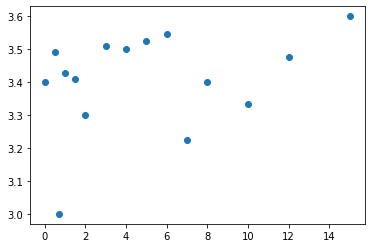

In [9]:
df_drink_amount_average = df_drinker.groupby("drinking_consumption_amount").mean().reset_index()
plt.scatter(df_drink_amount_average["drinking_consumption_amount"], df_drink_amount_average["gpa"])
plt.show()


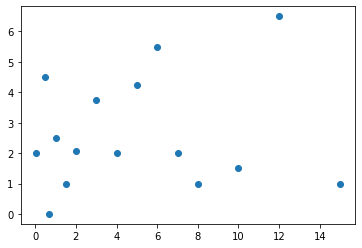

In [10]:
plt.scatter(df_drink_amount_average["drinking_consumption_amount"], df_drink_amount_average["academic_achievements"])
plt.show()

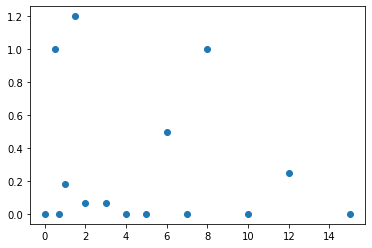

In [11]:
plt.scatter(df_drink_amount_average["drinking_consumption_amount"], df_drink_amount_average["professional_examinations"])
plt.show()

# Quantifying categorical values

In [12]:
df_drinker_quantified = df_drinker

df_drinker_quantified.loc[ df.year_of_study == "4 or above 四年級以上", "year_of_study" ] = 4

df_drinker_quantified.loc[ df.drinking_frequency == "Monthly or less 少於每月", "drinking_frequency" ] = 1
df_drinker_quantified.loc[ df.drinking_frequency == "Monthly or less 少於一個月", "drinking_frequency" ] = 1
df_drinker_quantified.loc[ df.drinking_frequency == "2-4 times a month 每月二至四次", "drinking_frequency" ] = 3
df_drinker_quantified.loc[ df.drinking_frequency == "2-3 times a week 每週二至三次", "drinking_frequency" ] = 10
df_drinker_quantified.loc[ df.drinking_frequency == "4 or more times a week 每週四次以上", "drinking_frequency" ] = 16

df_drinker_quantified.loc[ df.drinking_frequency_six_servings == "Daily or almost daily 每天或幾乎每天", "drinking_frequency_six_servings" ] = 16
df_drinker_quantified.loc[ df.drinking_frequency_six_servings == "Weekly 每週", "drinking_frequency_six_servings" ] = 4
df_drinker_quantified.loc[ df.drinking_frequency_six_servings == "Monthly 每月", "drinking_frequency_six_servings" ] = 1
df_drinker_quantified.loc[ df.drinking_frequency_six_servings == "Less than once per month 少於每月", "drinking_frequency_six_servings" ] = .5
df_drinker_quantified.loc[ df.drinking_frequency_six_servings == "Less than once per month 少於一個月", "drinking_frequency_six_servings" ] = .5
df_drinker_quantified.loc[ df.drinking_frequency_six_servings == "Never 從來不會", "drinking_frequency_six_servings" ] = 0

df_drinker_quantified.loc[ df.drinking_frequency_before_examination == "Never (0%) 從來不會", "drinking_frequency_before_examination" ] = 0
df_drinker_quantified.loc[ df.drinking_frequency_before_examination == "Occasionally (20%) 偶爾", "drinking_frequency_before_examination" ] = 2
df_drinker_quantified.loc[ df.drinking_frequency_before_examination == "Sometimes (40%) 有時", "drinking_frequency_before_examination" ] = 4
df_drinker_quantified.loc[ df.drinking_frequency_before_examination == "Often (60%) 經常", "drinking_frequency_before_examination" ] = 6
df_drinker_quantified.loc[ df.drinking_frequency_before_examination == "Usually (80%) 通常", "drinking_frequency_before_examination" ] = 8
df_drinker_quantified.loc[ df.drinking_frequency_before_examination == "Always (100%) 總是", "drinking_frequency_before_examination" ] = 10

df_drinker_quantified.loc[ df_drinker_quantified.activity_1 == "Yes 有", "activity_1" ] = 1
df_drinker_quantified.loc[ df_drinker_quantified.activity_1 == "No 沒有", "activity_1" ] = 0

df_drinker_quantified.loc[ df_drinker_quantified.activity_2 == "Yes 有", "activity_2" ] = 1
df_drinker_quantified.loc[ df_drinker_quantified.activity_2 == "No 沒有", "activity_2" ] = 0

quantified_columns = ["year_of_study", "drinking_frequency", "drinking_consumption_amount", "drinking_frequency_six_servings", "gpa", "activity_1", "activity_2", "academic_achievements", "professional_examinations"]

df_drinker_quantified = df_drinker_quantified[quantified_columns]

/opt/anaconda3/envs/gecc-fyp/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


['year_of_study', 'drinking_frequency', 'drinking_consumption_amount', 'drinking_frequency_six_servings', 'gpa']
[51.42255106 41.668533    4.09628567  2.49101017  0.32162009]


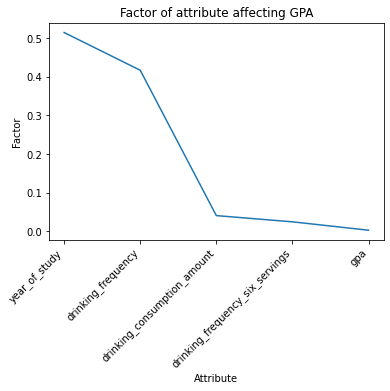

In [27]:
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler 

# X_scaler = StandardScaler()

# # selected attribute
# attribute = ["year_of_study", "drinking_frequency", "drinking_consumption_amount", "drinking_frequency_six_servings", "gpa"]
# X_train_scaled_attribute = X_scaler.fit_transform(df_drinker_quantified[attribute]) 
# df_drinker_quantified[attribute] = X_train_scaled_attribute

# x_att = df_drinker_quantified[attribute[:-1]]
# y_att = df_drinker_quantified[attribute[-1]]

# x_att_1 = np.array(x_att[attribute[0]])
# x_att_2 = np.array(x_att[attribute[1]])
# x_att_3 = np.array(x_att[attribute[2]])
# x_att_4 = np.array(x_att[attribute[3]])

# y_att_final = np.array(y_att)
# n = len(y_att_final)

# x_bias = np.ones((n, 1))

# x_att_1_reshape = np.reshape(x_att_1, (n, 1))
# x_att_2_reshape = np.reshape(x_att_2, (n, 1))
# x_att_3_reshape = np.reshape(x_att_3, (n, 1))
# x_att_4_reshape = np.reshape(x_att_4, (n, 1))

# x_att_final = np.append(x_bias, x_att_1_reshape, axis=1)
# x_att_final = np.append(x_att_final, x_att_2_reshape, axis=1)
# x_att_final = np.append(x_att_final, x_att_3_reshape, axis=1)
# x_prime = np.append(x_att_final, x_att_4_reshape, axis=1)

# x_prime_transpose = np.transpose(x_prime)

# theta = np.linalg.inv(x_prime_transpose.dot(x_prime)).dot(x_prime_transpose).dot(y_att_final)
# print("Parameter theta calculated by normal equation:", theta)

pca_tested_label = ["year_of_study", "drinking_frequency", "drinking_consumption_amount", "drinking_frequency_six_servings", "gpa"]

pca = PCA()
pca.fit(df_drinker_quantified[pca_tested_label])
print(pca_tested_label)
print(pca.explained_variance_ratio_ * 100)

# lin_regr = linear_model.LinearRegression()
# lin_regr.fit(df_drinker_quantified.drop(["gpa", "activity_1", "activity_2", "academic_achievements", "professional_examinations"], axis=1), df_drinker_quantified["gpa"])
# print(lin_regr.coef_)

# fig, axs = plt.subplots(2)
# axs[0].plot(["year_of_study", "drinking_frequency", "drinking_consumption_amount", "drinking_frequency_six_servings"], pca.explained_variance_ratio_)
# axs[0].xticks(rotation=45, ha="right")
# axs[1].plot(["year_of_study", "drinking_frequency", "drinking_consumption_amount", "drinking_frequency_six_servings"], lin_regr.coef_)
# axs[1].xticks(rotation=45, ha="right")

plt.plot(["year_of_study", "drinking_frequency", "drinking_consumption_amount", "drinking_frequency_six_servings", "gpa"], pca.explained_variance_ratio_)
plt.title("Factor of attribute affecting GPA")
plt.ylabel("Factor")
plt.xlabel("Attribute")
plt.xticks(rotation=45, ha="right")

plt.show()

/opt/anaconda3/envs/gecc-fyp/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 23569 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/envs/gecc-fyp/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 26044 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/envs/gecc-fyp/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 27599 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/envs/gecc-fyp/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/envs/gecc-fyp/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 20108 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/envs/gecc-fyp/lib/python3.8/site-package

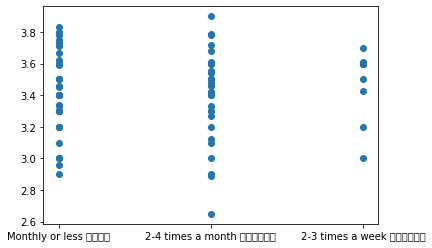

In [31]:
df_drinking_frequency_average = df_drinker[["drinking_frequency", "gpa", "academic_achievements", "professional_examinations"]].groupby("drinking_frequency")
plt.scatter(df_drinker["drinking_frequency"], df_drinker["gpa"])
plt.show()

In [ ]:
plt.scatter(df_drink_amount_average["drinking_frequenccy"], df_drink_amount_average["academic_achievements"])
plt.show()

In [15]:
df.loc[~(df["drinking_consumption_amount"] == 0) & (df["drinking_frequency"] == "Never 從來不飲用")]

,gender,age,local_or_non_local,university,current_study,year_of_study,drinking_frequency,drinking_consumption_amount,drinking_frequency_six_servings,type_of_drink,drinking_occasion,drinking_frequency_before_examination,gpa,activity_1,activity_2,academic_achievements,professional_examinations,nationality
74,Female 女性,18,Local student 本地生,The Chinese University of Hong Kong (CUHK) 香港中文大學,Undergraduate student 本科生,2,Never 從來不飲用,0.3,Never 從來不會,I don't consume alcoholic beverage 我不飲用含酒精的飲料,I don't consume alcoholic beverage 我不飲用含酒精的飲料,Never (0%) 從來不會,3.4,Yes 有,No 沒有,0,0.0,Hong Kong


In [28]:
df.loc[ ~(df["gpa"] == 0) ].describe()

,age,drinking_consumption_amount,gpa,academic_achievements,professional_examinations
count,96.000000,96.000000,96.000000,96.000000,96.00000
mean,20.739583,2.713854,3.405260,2.958333,0.21875
std,1.495571,3.149420,0.428561,4.306462,0.83607
min,18.000000,0.000000,0.100000,0.000000,0.00000
25%,20.000000,1.000000,3.300000,0.000000,0.00000
50%,21.000000,2.000000,3.460000,2.000000,0.00000
75%,21.000000,3.000000,3.600000,4.000000,0.00000
max,28.000000,15.000000,4.000000,25.000000,6.00000


In [7]:
print(df_non_drinker["gpa"].replace(0, np.nan).mean())
print(df_drinker["gpa"].replace(0, np.nan).mean())

3.58225
3.377794871794871


In [8]:
df_non_drinker["gpa"]

21     3.380
38     3.780
45     3.370
47     0.000
66     3.540
68     3.400
69     3.998
78     3.480
79     0.000
84     3.600
87     4.000
99     0.000
107    3.500
116    3.839
122    3.100
Name: gpa, dtype: float64

In [14]:
st.ttest_ind(a=df_non_drinker["gpa"].replace(0, np.nan).dropna().to_numpy(), b=df_drinker["gpa"].replace(0, np.nan).dropna().to_numpy(), equal_var=True)

Ttest_indResult(statistic=1.5031804039537333, pvalue=0.13637288748986434)

In [15]:
(df_non_drinker["gpa"].replace(0, np.nan).dropna().mean() - df["gpa"].replace(0, np.nan).dropna().mean()) / (df["gpa"].replace(0, np.nan).dropna().std() / len(df["gpa"].replace(0, np.nan).dropna())**0.5)

3.8055392183864387

In [23]:
df["academic_achievements"].max()

25

<AxesSubplot:xlabel='drinking_consumption_amount'>

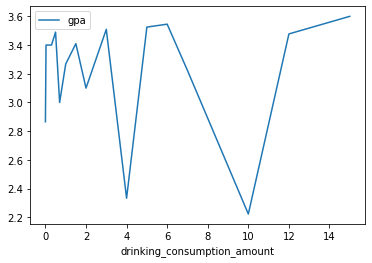

In [35]:
test_df = df[["drinking_consumption_amount", "gpa"]]
data = test_df.groupby("drinking_consumption_amount").mean()
data.plot()
# data.set_index(pd.Series(range(len(data))), inplace=True)


# plt.bar(x=list(data["drinking_consumption_amount"]), y=list(data["gpa"]), height=1)
# plt.xlabel("consumption")
# plt.ylabel("gpa")
# plt.show()